In [ ]:
pip install Fuzzy

In [ ]:
pip install scikit-fuzzy

In [ ]:
pip install matplotlib

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [55]:
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[5,5,7])
food['good']= fuzz.trimf(food.universe,[7,7,10])
tip['much']= fuzz.trimf(tip.universe,[25,25,30])
tip['normal']= fuzz.trimf(tip.universe,[20,20,25])
tip['less']= fuzz.trimf(tip.universe,[10,10,20])
service['good']= fuzz.trimf(service.universe,[8,8,10])
service['average']= fuzz.trimf(service.universe,[6,6,8])
service['poor']= fuzz.trimf(service.universe,[0,0,6])


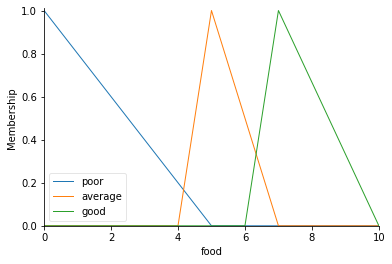

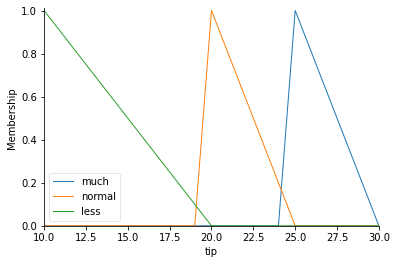

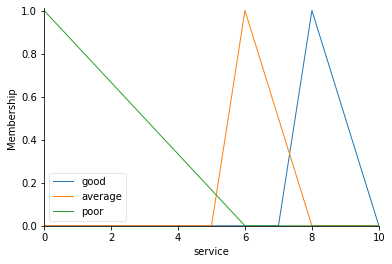

In [58]:
food.view()
tip.view()
service.view()

In [69]:
Rule1 = ctrl.Rule(food['poor']& service['poor'],tip['less'] )
Rule2 = ctrl.Rule(food['poor']& service['average'],tip['normal'] )
Rule3 = ctrl.Rule(food['poor']& service['good'],tip['normal'] )
Rule4 = ctrl.Rule(food['average']& service['poor'],tip['normal'] )
Rule5 = ctrl.Rule(food['average']& service['average'],tip['much'] )
Rule6 = ctrl.Rule(food['average']& service['good'],tip['much'] )
Rule7 = ctrl.Rule(food['good']& service['poor'],tip['normal'] )
Rule8 = ctrl.Rule(food['good']& service['average'],tip['much'] )
Rule9 = ctrl.Rule(food['good']& service['good'],tip['much'] )



21.838383838383848


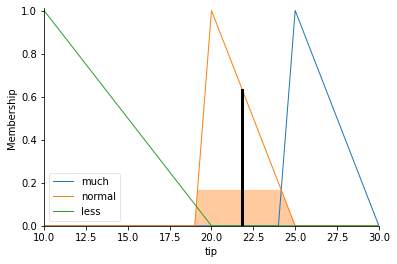

In [72]:
tipping_ctrl = ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=8
tipping.input['service']=5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)